In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.gridspec as grid
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

data = pd.read_csv("Data\whole_data.csv",index_col=0)

In [2]:
data.head()

,sex,cp,fbs,restecg,exang,thal,class,age,trestbps,chol,thalach,oldpeak,slope,ca
0,1_,1_,1_,1_2_,0_,6.0_,0_,63,145,233,150,2.3,3,0.0
1,1_,4_,0_,1_2_,1_,3.0_,1_,67,160,286,108,1.5,2,3.0
2,1_,4_,0_,1_2_,1_,7.0_,1_,67,120,229,129,2.6,2,2.0
3,1_,3_,0_,0_,0_,3.0_,0_,37,130,250,187,3.5,3,0.0
4,0_,2_,0_,1_2_,0_,3.0_,0_,41,130,204,172,1.4,1,0.0


In [3]:
data_num=data.select_dtypes(include=[np.number])

data_cat=data.select_dtypes(exclude=[np.number])

In [4]:
## From scatter plots we can see there are no obvuous mutlticolnearity btween varaible. Though mutltiolinearity with more than two varibles might still be there which we check after model fitting

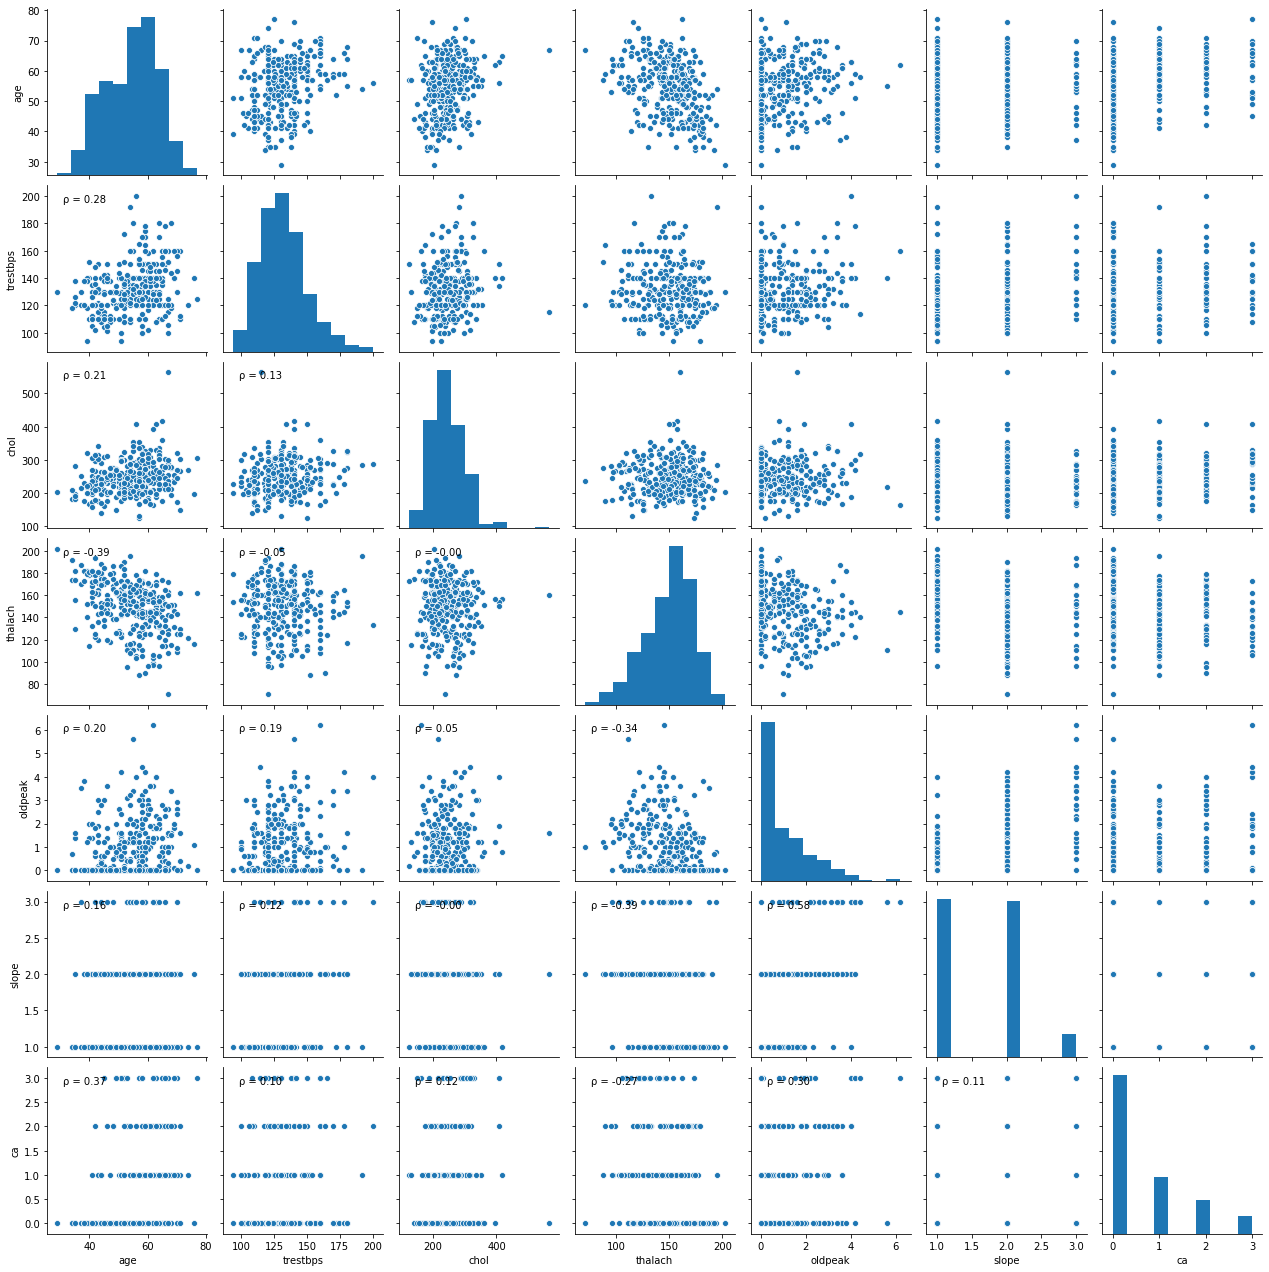

In [7]:
g = sns.pairplot(data_num)
g.map_lower(corrfunc)


g.savefig('scatter2.png', dpi=300)

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy

In [31]:
## We can infer from plots as well as t test that 'age' seems to be important predictor varaible for class

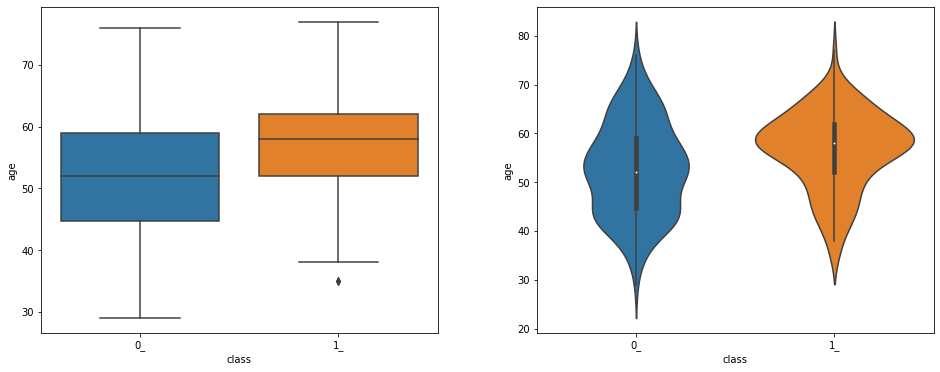

In [27]:
fig = plt.figure(figsize=(16, 6))
gs = grid.GridSpec(1, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.boxplot(data = data, x='class', y='age',ax=ax0)
sns.violinplot(data = data, x='class', y='age',ax=ax1)
plt.show()

In [28]:
lm= ols(formula='Q("age") ~ Q("class")',data=data).fit()

In [30]:
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
"Q(""class"")",1.0,1228.268821,1228.268821,15.769637,0.00009
Residual,301.0,23444.351641,77.888211,NaN,NaN


In [42]:
scipy.stats.ttest_ind(data[data['class']=='1_']['age'], data[data['class']=='0_']['age'],equal_var = False)

Ttest_indResult(statistic=4.0303470663221095, pvalue=7.061439075547293e-05)

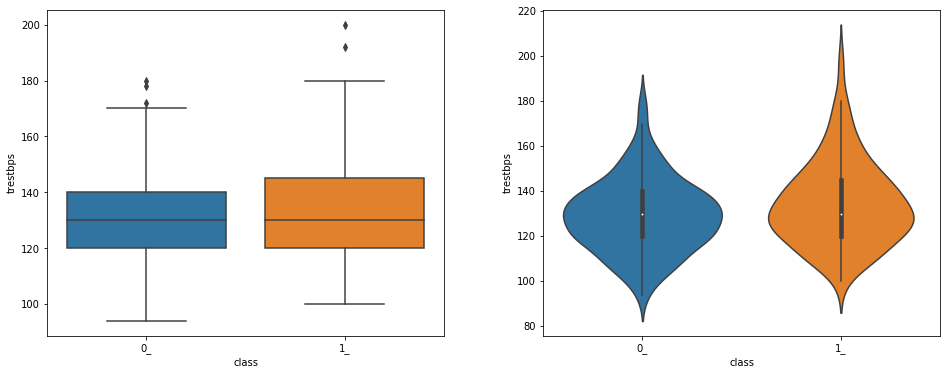

Ttest_indResult(statistic=2.615233002327402, pvalue=0.009409469224173054)

In [43]:
fig = plt.figure(figsize=(16, 6))
gs = grid.GridSpec(1, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.boxplot(data = data, x='class', y='trestbps',ax=ax0)
sns.violinplot(data = data, x='class', y='trestbps',ax=ax1)
plt.show()
scipy.stats.ttest_ind(data[data['class']=='1_']['trestbps'], data[data['class']=='0_']['trestbps'],equal_var = False)

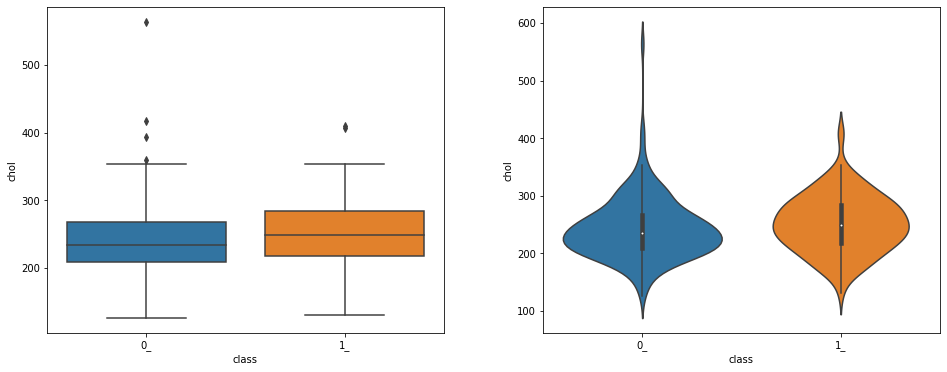

Ttest_indResult(statistic=1.4924048025749725, pvalue=0.1366486884334473)

In [44]:
fig = plt.figure(figsize=(16, 6))
gs = grid.GridSpec(1, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.boxplot(data = data, x='class', y='chol',ax=ax0)
sns.violinplot(data = data, x='class', y='chol',ax=ax1)
plt.show()
scipy.stats.ttest_ind(data[data['class']=='1_']['chol'], data[data['class']=='0_']['chol'],equal_var = False)

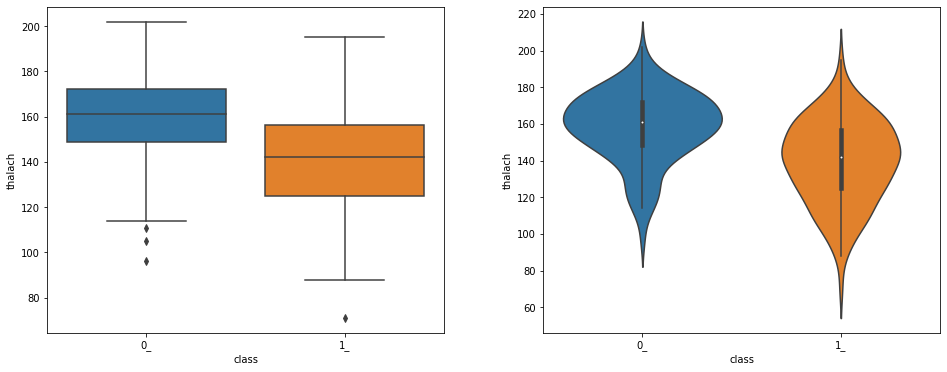

Ttest_indResult(statistic=-7.857935605524213, pvalue=9.106165923728751e-14)

In [45]:
fig = plt.figure(figsize=(16, 6))
gs = grid.GridSpec(1, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.boxplot(data = data, x='class', y='thalach',ax=ax0)
sns.violinplot(data = data, x='class', y='thalach',ax=ax1)
plt.show()
scipy.stats.ttest_ind(data[data['class']=='1_']['thalach'], data[data['class']=='0_']['thalach'],equal_var = False)

In [116]:
data_cat.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal', 'class'], dtype='object')

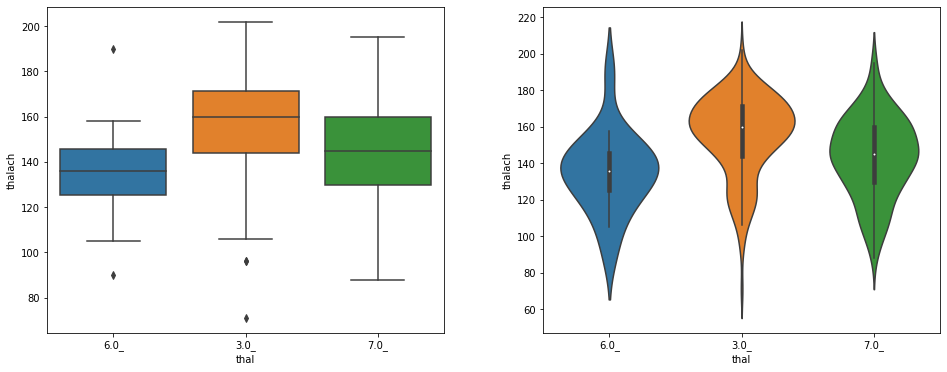

In [122]:
fig = plt.figure(figsize=(16, 6))
gs = grid.GridSpec(1, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.boxplot(data = data, x='thal', y='thalach',ax=ax0)
sns.violinplot(data = data, x='thal', y='thalach',ax=ax1)
plt.show()
#scipy.stats.ttest_ind(data[data['sex']=='1_']['thalach'], data[data['sex']=='0_']['thalach'],equal_var = False)

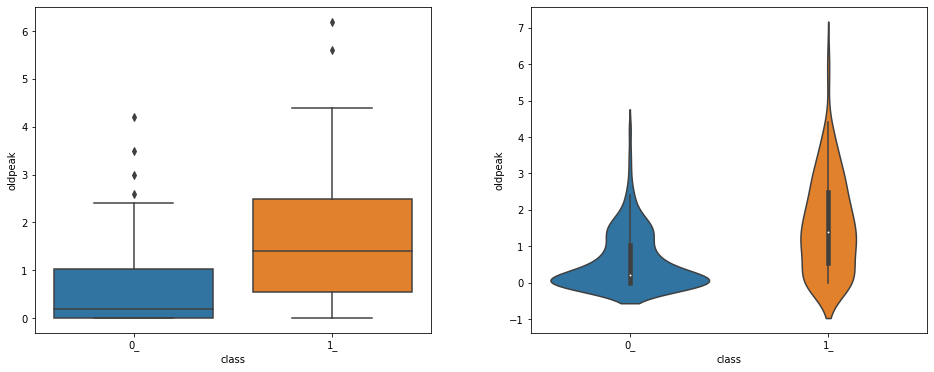

Ttest_indResult(statistic=7.823428221425006, pvalue=2.1951749959954859e-13)

In [46]:
fig = plt.figure(figsize=(16, 6))
gs = grid.GridSpec(1, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.boxplot(data = data, x='class', y='oldpeak',ax=ax0)
sns.violinplot(data = data, x='class', y='oldpeak',ax=ax1)
plt.show()
scipy.stats.ttest_ind(data[data['class']=='1_']['oldpeak'], data[data['class']=='0_']['oldpeak'],equal_var = False)

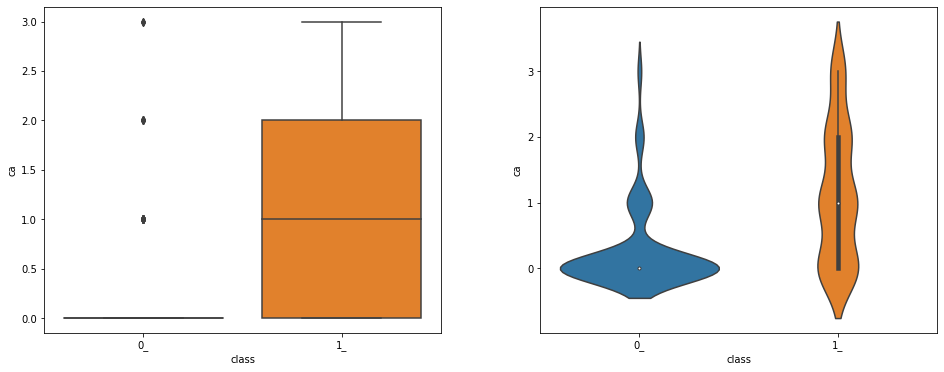

Ttest_indResult(statistic=8.65926414589036, pvalue=9.969799007874044e-16)

In [47]:
fig = plt.figure(figsize=(16, 6))
gs = grid.GridSpec(1, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.boxplot(data = data, x='class', y='ca',ax=ax0)
sns.violinplot(data = data, x='class', y='ca',ax=ax1)
plt.show()
scipy.stats.ttest_ind(data[data['class']=='1_']['ca'], data[data['class']=='0_']['ca'],equal_var = False)

In [48]:
data_cat.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal', 'class'], dtype='object')

In [52]:
scipy.stats.chisquare?

(22.042560606155472,
 2.666712348180942e-06,
 1,
 array([[ 52.50165017,  44.49834983],
        [111.49834983,  94.50165017]]))

In [63]:
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [81]:
data['temp'] = data['sex'].apply(lambda x:'population')

## The p value is less than 0.05 and people with heart disease have more proportion of males. Sex seems to be an important variables

(22.042560606155472, 2.666712348180942e-06, 1, array([[ 52.50165017,  44.49834983],
       [111.49834983,  94.50165017]]))


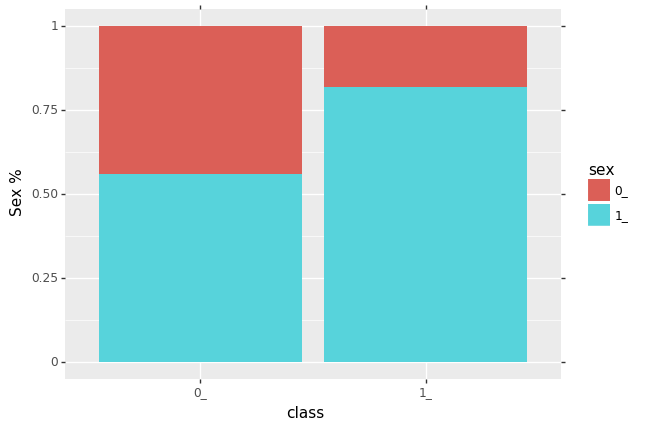

<ggplot: (143849111069)>

In [83]:
print(scipy.stats.chi2_contingency(pd.crosstab(data['sex'], data['class'])))
plot1 = ggplot(aes(x='class',fill='sex'),data = data) + geom_bar(position='fill') + ylab('Sex %')
plot1

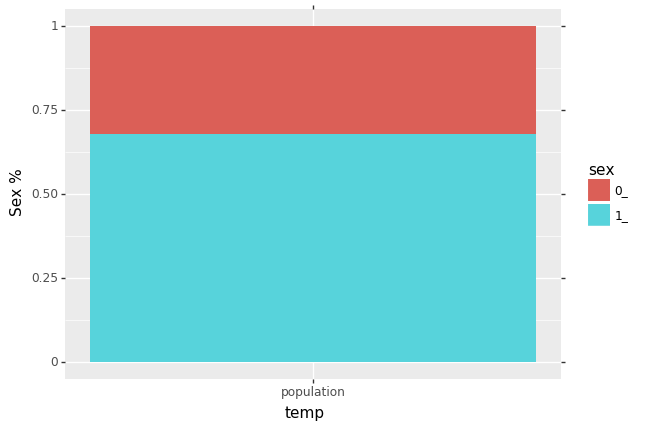

<ggplot: (-9223371893005698237)>

In [82]:
plot1 = ggplot(aes(x='temp',fill='sex'),data = data) + geom_bar(position='fill') + ylab('Sex %')
plot1

In [84]:
data_cat.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal', 'class'], dtype='object')

In [ ]:
## p values < 0.05 and percen bar plot suggest that cp is an important variable

(81.81577027653815, 1.2517106007837527e-17, 3, array([[12.44884488, 10.55115512],
       [27.06270627, 22.93729373],
       [46.54785479, 39.45214521],
       [77.94059406, 66.05940594]]))


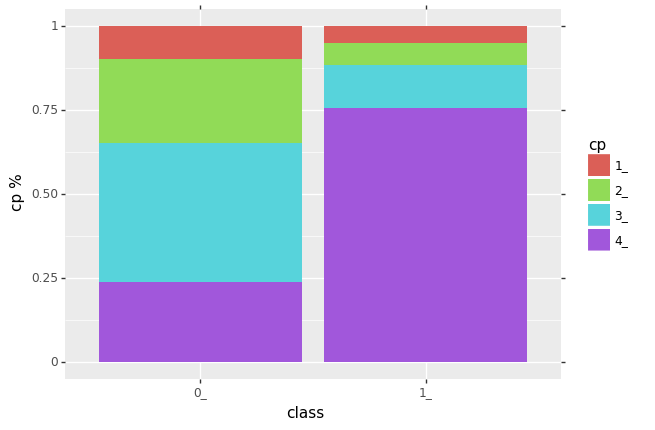

<ggplot: (143849369029)>

In [87]:
print(scipy.stats.chi2_contingency(pd.crosstab(data['cp'], data['class'])))
plot1 = ggplot(aes(x='class',fill='cp'),data = data) + geom_bar(position='fill') + ylab('cp %')
plot1

In [89]:
## p value and percent box plot suggest that fbs doesnt seems to be important

(0.07709504829488663, 0.7812734067063785, 1, array([[139.64356436, 118.35643564],
       [ 24.35643564,  20.64356436]]))


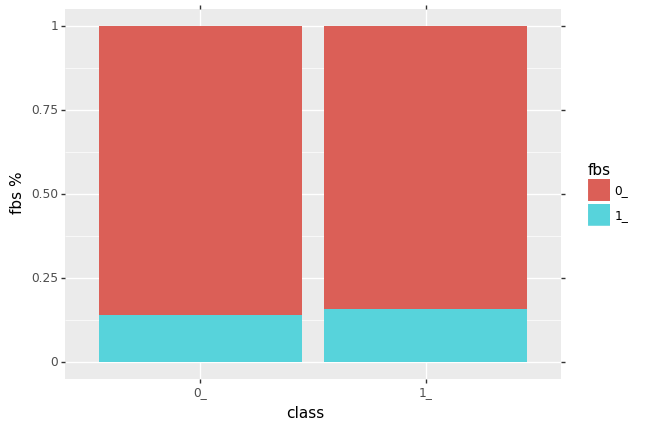

<ggplot: (-9223371893005346160)>

In [90]:
print(scipy.stats.chi2_contingency(pd.crosstab(data['fbs'], data['class'])))
plot1 = ggplot(aes(x='class',fill='fbs'),data = data) + geom_bar(position='fill') + ylab('fbs %')
plot1

In [ ]:
## p values < 0.05 and percen bar plot suggest that restecg is an inportant variable

(8.671079079180691, 0.0032329969706756416, 1, array([[81.72937294, 69.27062706],
       [82.27062706, 69.72937294]]))


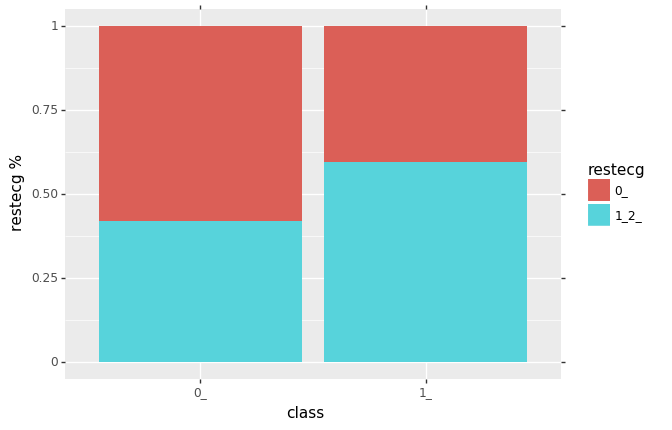

<ggplot: (143849429750)>

In [91]:
print(scipy.stats.chi2_contingency(pd.crosstab(data['restecg'], data['class'])))
plot1 = ggplot(aes(x='class',fill='restecg'),data = data) + geom_bar(position='fill') + ylab('restecg %')
plot1

In [ ]:
## p values < 0.05 and percen bar plot suggest that exang is an important variable

(54.68643453080239, 1.413788096718085e-13, 1, array([[110.41584158,  93.58415842],
       [ 53.58415842,  45.41584158]]))


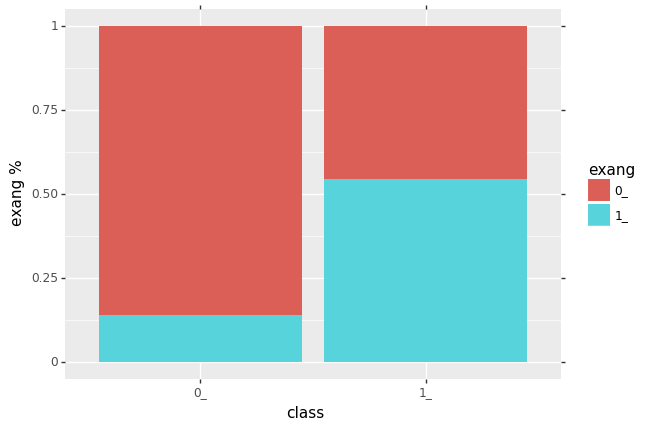

<ggplot: (-9223371893005391216)>

In [92]:
print(scipy.stats.chi2_contingency(pd.crosstab(data['exang'], data['class'])))
plot1 = ggplot(aes(x='class',fill='exang'),data = data) + geom_bar(position='fill') + ylab('exang %')
plot1

In [ ]:
## p values < 0.05 and percent bar plot suggest that thal is an important variable

(82.68454919795069, 1.1098857420294702e-18, 2, array([[90.93069307, 77.06930693],
       [ 9.74257426,  8.25742574],
       [63.32673267, 53.67326733]]))


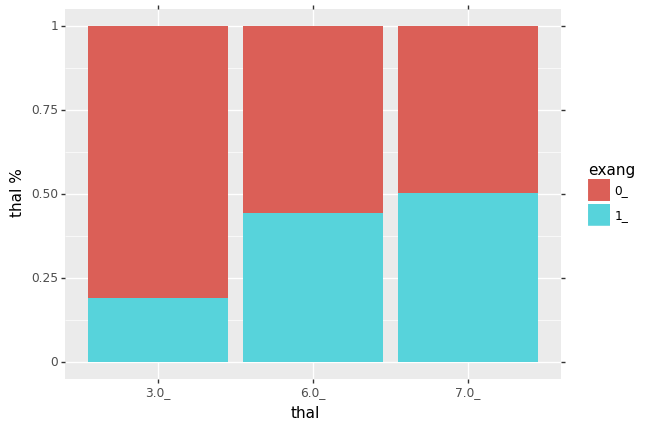

<ggplot: (143849405567)>

In [94]:
print(scipy.stats.chi2_contingency(pd.crosstab(data['thal'], data['class'])))
plot1 = ggplot(aes(x='thal',fill='exang'),data = data) + geom_bar(position='fill') + ylab('thal %')
plot1

In [96]:
data1 = pd.concat([data_cat,data_num],axis=1)

In [97]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data1, test_size=0.10)

In [107]:
train.loc[:,'sex':'class'].apply(lambda x:len(x.unique()))==data1.loc[:,'sex':'class'].apply(lambda x:len(x.unique()))

sex        True
cp         True
fbs        True
restecg    True
exang      True
thal       True
class      True
dtype: bool

In [108]:
test.loc[:,'sex':'class'].apply(lambda x:len(x.unique()))==data1.loc[:,'sex':'class'].apply(lambda x:len(x.unique()))

sex        True
cp         True
fbs        True
restecg    True
exang      True
thal       True
class      True
dtype: bool

In [111]:
train.loc[:,'sex':'class'].apply(lambda x:x.value_counts().to_list())

sex                [186, 86]
cp         [131, 78, 43, 20]
fbs                [231, 41]
restecg           [139, 133]
exang              [180, 92]
thal          [148, 107, 17]
class             [146, 126]
dtype: object

In [112]:
data1.loc[:,'sex':'class'].apply(lambda x:x.value_counts().to_list())

sex                [206, 97]
cp         [144, 86, 50, 23]
fbs                [258, 45]
restecg           [152, 151]
exang              [204, 99]
thal          [168, 117, 18]
class             [164, 139]
dtype: object

In [114]:
train.to_csv('Data/data_train_2.csv')
test.to_csv('Data/data_test_2.csv')

In [123]:
data_cat.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal', 'class'], dtype='object')

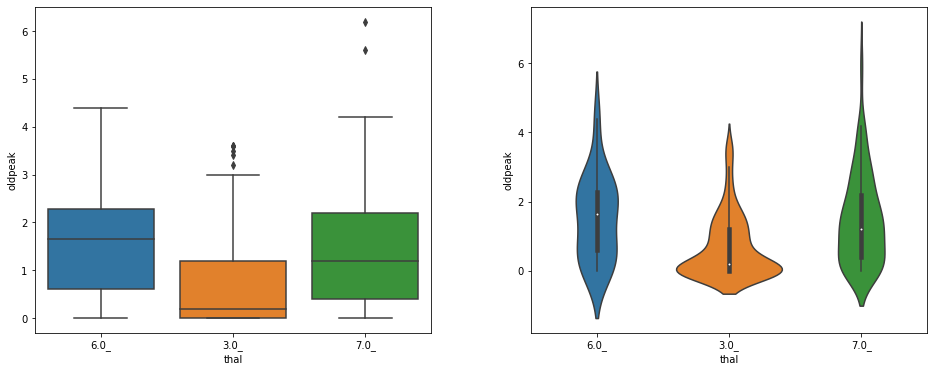

In [129]:
fig = plt.figure(figsize=(16, 6))
gs = grid.GridSpec(1, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.boxplot(data = data, x='thal', y='oldpeak',ax=ax0)
sns.violinplot(data = data, x='thal', y='oldpeak',ax=ax1)
plt.show()
#scipy.stats.ttest_ind(data[data['fbs']=='1_']['oldpeak'], data[data['fbs']=='0_']['oldpeak'],equal_var = False)

In [142]:
data['chol2']=np.log(data['chol'])

In [151]:
data['slope2']=np.power(data['slope'],2)

In [143]:
data_num.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca'], dtype='object')

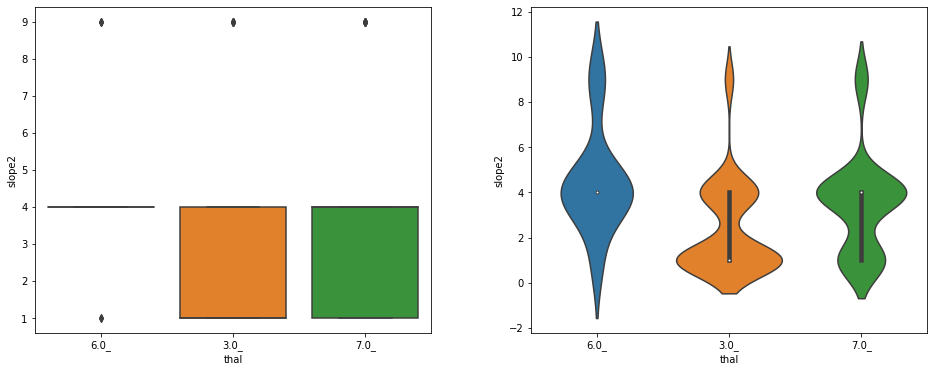

In [193]:
fig = plt.figure(figsize=(16, 6))
gs = grid.GridSpec(1, 2, wspace=0.25, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.boxplot(data = data, x='thal', y='slope2',ax=ax0)
sns.violinplot(data = data, x='thal', y='slope2',ax=ax1)

In [ ]:
exang*oldpeak+exang*thalach+exang*age

exang*age

In [155]:
data_cat.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal', 'class'], dtype='object')

(32.07767069531775, 1.0824860600931006e-07, 2, array([[113.10891089,  54.89108911],
       [ 12.11881188,   5.88118812],
       [ 78.77227723,  38.22772277]]))


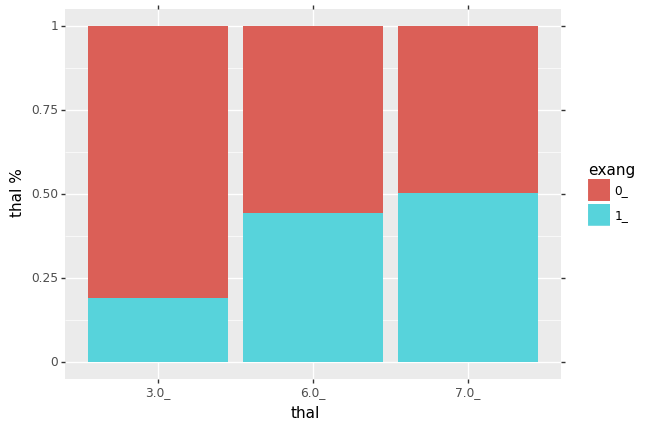

<ggplot: (-9223371893000569877)>

In [176]:
print(scipy.stats.chi2_contingency(pd.crosstab(data['thal'], data['exang'])))
plot1 = ggplot(aes(x='thal',fill='exang'),data = data) + geom_bar(position='fill') + ylab('thal %')
plot1